# Importing Libraries

In [2]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [47]:
from pylab import *
import pandas as pd
import seaborn as sns
from pywaffle import Waffle
from sklearn.linear_model import LinearRegression

# Loading Dataset

In [4]:
df = pd.read_csv('Sleep_Efficiency.csv')

In [5]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


# Understanding the Dataset

In [6]:
df.shape

(452, 15)

In [7]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [9]:
#Knowing the percentage of the null values
df.isnull().sum()/df.shape[0]

ID                        0.000000
Age                       0.000000
Gender                    0.000000
Bedtime                   0.000000
Wakeup time               0.000000
Sleep duration            0.000000
Sleep efficiency          0.000000
REM sleep percentage      0.000000
Deep sleep percentage     0.000000
Light sleep percentage    0.000000
Awakenings                0.044248
Caffeine consumption      0.055310
Alcohol consumption       0.035398
Smoking status            0.000000
Exercise frequency        0.013274
dtype: float64

# Data pre-processing

In [10]:
#Duplicates
df.drop_duplicates(inplace=True)


In [52]:
df.shape

(452, 15)

In [12]:
#Editing the columns
def edit(i):
    i = int(i[11:13])
    return i
    
    

In [13]:
l = list(df['Bedtime'])
bedtime = []
for i in l:
    bedtime.append(edit(i))

print(bedtime)

    
    

[1, 2, 21, 2, 1, 21, 21, 0, 2, 1, 0, 22, 2, 1, 1, 22, 1, 23, 0, 0, 0, 2, 22, 2, 0, 0, 0, 2, 21, 22, 0, 0, 0, 0, 21, 1, 22, 0, 0, 2, 22, 1, 0, 22, 23, 1, 0, 0, 0, 21, 22, 2, 1, 1, 1, 22, 1, 2, 1, 21, 2, 22, 21, 21, 1, 1, 0, 1, 0, 22, 2, 23, 21, 2, 22, 0, 21, 2, 22, 2, 1, 21, 2, 22, 22, 23, 0, 0, 2, 0, 2, 21, 21, 22, 0, 2, 21, 23, 2, 1, 0, 1, 0, 23, 23, 22, 21, 0, 23, 0, 0, 23, 23, 1, 0, 0, 0, 21, 22, 21, 22, 1, 0, 1, 2, 22, 0, 23, 23, 21, 0, 0, 22, 21, 23, 0, 0, 2, 2, 0, 22, 21, 22, 21, 2, 1, 23, 0, 21, 2, 1, 23, 23, 2, 2, 1, 21, 21, 1, 0, 2, 21, 22, 0, 2, 22, 23, 22, 23, 1, 21, 21, 23, 2, 22, 22, 2, 2, 0, 23, 2, 21, 21, 0, 21, 23, 0, 0, 2, 1, 0, 22, 0, 2, 21, 2, 0, 2, 1, 22, 0, 2, 0, 23, 22, 21, 1, 2, 22, 2, 0, 1, 23, 0, 0, 23, 21, 0, 1, 1, 21, 23, 0, 2, 23, 1, 22, 21, 0, 22, 1, 23, 23, 1, 1, 21, 21, 1, 1, 22, 22, 0, 2, 0, 22, 1, 22, 22, 0, 0, 21, 0, 2, 21, 1, 2, 0, 22, 22, 21, 22, 22, 21, 0, 22, 2, 0, 22, 1, 0, 0, 21, 1, 0, 22, 23, 22, 21, 2, 22, 0, 2, 21, 23, 2, 23, 22, 21, 23, 22, 2

In [14]:
df['Bedtime'] = bedtime

In [15]:
l = list(df['Wakeup time'])
wakeup = [ ]
for i in l:
    wakeup.append(edit(i))

df['Wakeup time'] = wakeup
    

In [16]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,1,7,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2,9,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,21,5,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2,8,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,1,9,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [17]:
#converting categorical data into numerical data
dummies = pd.get_dummies(df['Smoking status'])
print(dummies)

     No  Yes
0     0    1
1     0    1
2     1    0
3     0    1
4     1    0
..   ..  ...
447   1    0
448   1    0
449   0    1
450   1    0
451   1    0

[452 rows x 2 columns]


In [18]:
df = df.join(dummies)

In [19]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,No,Yes
0,1,65,Female,1,7,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0,0,1
1,2,69,Male,2,9,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0,0,1
2,3,40,Female,21,5,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,1,0
3,4,40,Female,2,8,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0,0,1
4,5,57,Male,1,9,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1,0


In [20]:
#dropping the 'No' column and renaming 'Yes' to 'Smoking status'
df.drop(['No'],axis="columns",inplace=True)

In [21]:
df.rename(columns={'Yes':'smoking status'},inplace=True)

In [22]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,smoking status
0,1,65,Female,1,7,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0,1
1,2,69,Male,2,9,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0,1
2,3,40,Female,21,5,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,0
3,4,40,Female,2,8,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0,1
4,5,57,Male,1,9,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,0


In [23]:
df.drop(['Smoking status'],axis="columns",inplace=True)

# Descriptive Statistics

## Gender 

Text(0.5, 1.0, 'Gender Statistics')

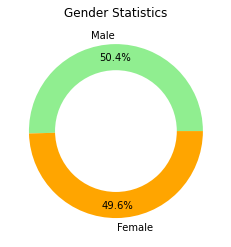

In [24]:
#Doughnut graph
gender = ['Male','Female']
count = list(df['Gender'].value_counts())
colors = ['LightGreen','Orange']
pie(count,colors=colors,labels=gender,autopct="%1.1f%%",pctdistance=0.85)

center_circle = Circle((0,0),0.70,fc='white')
fig = gcf()
fig.gca().add_artist(center_circle)
title("Gender Statistics")

## Visualization of Age column

<AxesSubplot:ylabel='Age'>

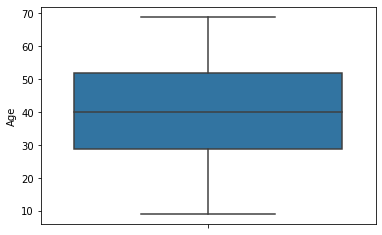

In [25]:
#Boxplot
sns.boxplot(y="Age",data=df)

## Sleep Duration

<AxesSubplot:xlabel='Sleep duration', ylabel='count'>

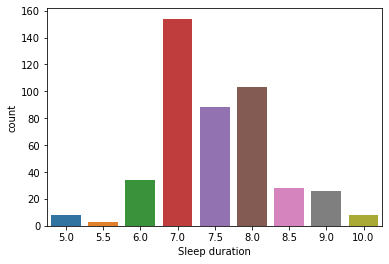

In [26]:
#Countplot
sns.countplot(x="Sleep duration",data=df)

## Sleep Efficiency

<AxesSubplot:ylabel='Sleep efficiency'>

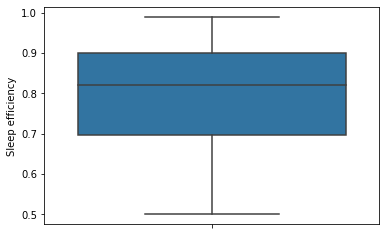

In [27]:
#Boxplot
sns.boxplot(data=df,y="Sleep efficiency")


## Rapid Eye Movement sleep

<AxesSubplot:ylabel='REM sleep percentage'>

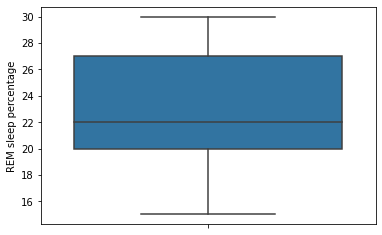

In [28]:
sns.boxplot(y="REM sleep percentage",data=df)

## Deep sleep percentage

<AxesSubplot:ylabel='Deep sleep percentage'>

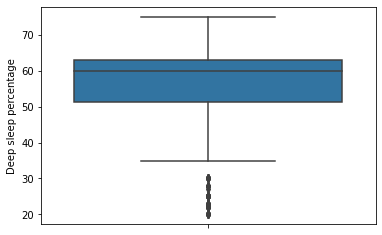

In [29]:
sns.boxplot(y="Deep sleep percentage",data=df)

## Light sleep percentage

<AxesSubplot:ylabel='Light sleep percentage'>

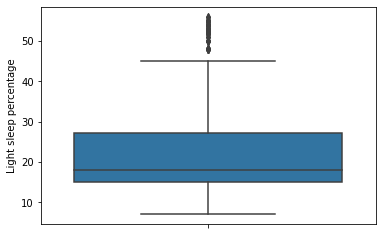

In [30]:
sns.boxplot(y="Light sleep percentage",data=df)

## Awakenings

<AxesSubplot:ylabel='Awakenings'>

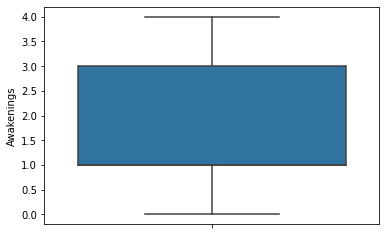

In [31]:
sns.boxplot(y="Awakenings",data=df)

# Diagnostic Analysis

## Age and Sleep efficiency

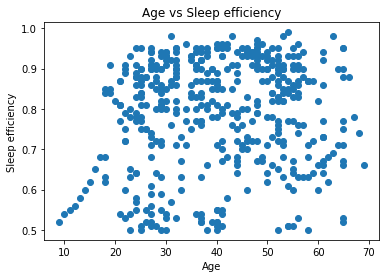

In [32]:
x = df['Age']
y = df['Sleep efficiency']
title('Age vs Sleep efficiency')
xlabel('Age')
ylabel('Sleep efficiency')

scatter(x,y)
show()

## Gender and sleep efficiency

<AxesSubplot:xlabel='Gender', ylabel='Sleep efficiency'>

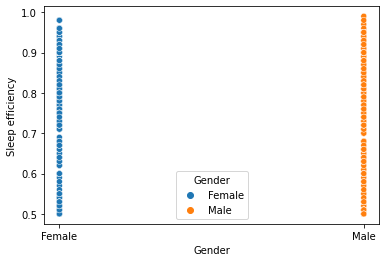

In [33]:
sns.scatterplot(data=df,x="Gender",y="Sleep efficiency",hue="Gender")

Both the genders have about all values of sleep efficiency.

## Sleep duration and sleep efficiency

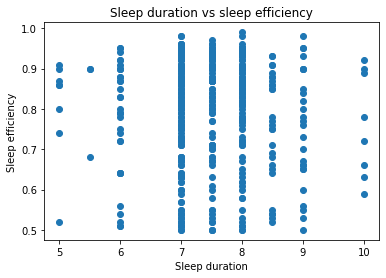

In [35]:
x = df['Sleep duration']
y = df['Sleep efficiency']
title('Sleep duration vs sleep efficiency')
xlabel('Sleep duration')
ylabel('Sleep efficiency')
scatter(x,y)
show()

## Rapid Eye Movement and sleep efficiency

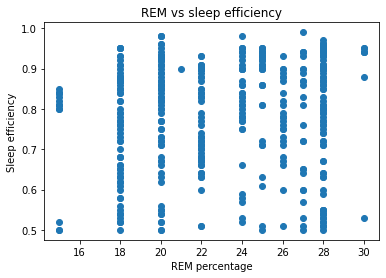

In [36]:
x = df['REM sleep percentage']
y = df['Sleep efficiency']
title('REM vs sleep efficiency')
xlabel('REM percentage')
ylabel('Sleep efficiency')
scatter(x,y)
show()

## Deep sleep percentage and sleep efficiency

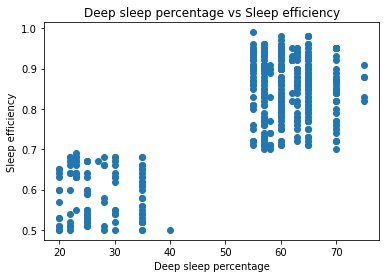

In [37]:
x = df['Deep sleep percentage']
y = df['Sleep efficiency']
scatter(x,y)
title('Deep sleep percentage vs Sleep efficiency')
xlabel('Deep sleep percentage')
ylabel('Sleep efficiency')
show()

## Light sleep percentage and sleep efficiency

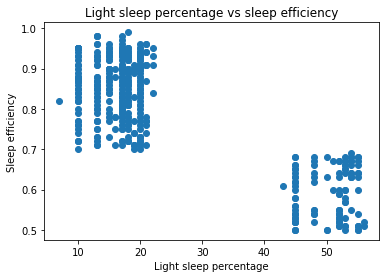

In [38]:
x = df['Light sleep percentage']
y = df['Sleep efficiency']
scatter(x,y)
title('Light sleep percentage vs sleep efficiency')
xlabel('Light sleep percentage')
ylabel('Sleep efficiency')
show()

## Awakenings and sleep efficiency

<AxesSubplot:xlabel='Awakenings', ylabel='Sleep efficiency'>

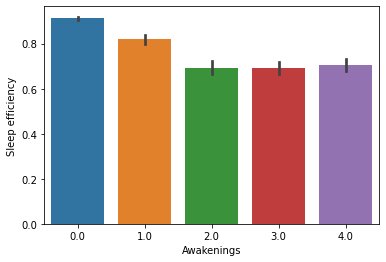

In [39]:
#barplot
sns.barplot(x='Awakenings', y='Sleep efficiency',data=df)

Awakenings and sleep efficiency appears to have a linear relationship

## Caffeine consumption and sleep efficiency

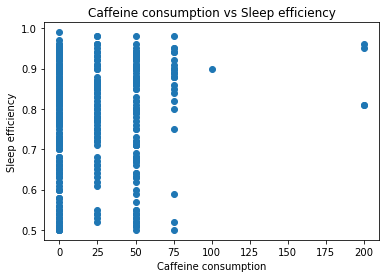

In [40]:
x = df['Caffeine consumption']
y = df['Sleep efficiency']
scatter(x,y)
title('Caffeine consumption vs Sleep efficiency')
xlabel('Caffeine consumption')
ylabel('Sleep efficiency')
show()

## Smoking status and sleep efficiency

<AxesSubplot:xlabel='smoking status', ylabel='Sleep efficiency'>

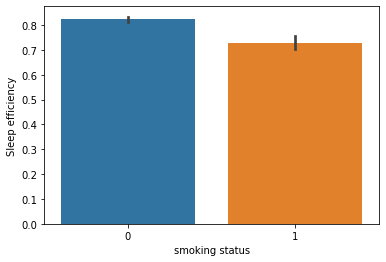

In [41]:
#barplot
sns.barplot(x='smoking status',y='Sleep efficiency',data=df)

## Exercise frequency and sleep efficiency

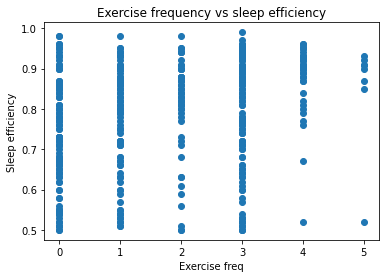

In [79]:
x = df['Exercise frequency']
y = df['Sleep efficiency']
scatter(x,y)
title('Exercise frequency vs sleep efficiency')
xlabel('Exercise freq')
ylabel('Sleep efficiency')
show()